<a href="https://colab.research.google.com/github/AhmedHisham99/fruit_classification/blob/master/Fruits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import zipfile

In [0]:
import numpy as np

In [0]:
import pandas as pd

In [0]:
#from turicreate import SFrame

In [0]:
import matplotlib.pyplot as plt

In [0]:
import glob

In [0]:
import cv2

In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras

In [51]:
import os
x=(os.listdir("local_zip/fruits-360_dataset/fruits-360/Training"))
print(len(x))

120


In [0]:
local_zip = 'drive/My Drive/fruits.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('local_zip')
zip_ref.close()

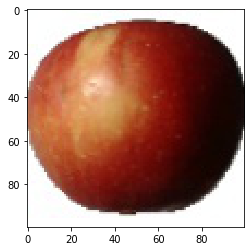

In [53]:
#test trainning set
products=('local_zip/fruits-360_dataset/fruits-360/Training/Apple Braeburn/0_100.jpg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(products)
imgplot = plt.imshow(img)
plt.show()

In [54]:
training_fruit_img = []
training_label = []
for dir_path in glob.glob("local_zip/fruits-360_dataset/fruits-360/Training/*"):
    img_label = dir_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        training_fruit_img.append(img)
        training_label.append(img_label)
training_fruit_img = np.array(training_fruit_img)
training_label = np.array(training_label)
len(np.unique(training_label))

120

In [55]:
test_fruit_img = []
test_label = []
for dir_path in glob.glob("local_zip/fruits-360_dataset/fruits-360/Test/*"):
    img_label = dir_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        test_fruit_img.append(img)
        test_label.append(img_label)
test_fruit_img = np.array(test_fruit_img)
test_label = np.array(test_label)
len(np.unique(test_label))

120

In [56]:
test_fruits_img = []
tests_label = []
for img_path in glob.glob(os.path.join("local_zip/fruits-360_dataset/fruits-360/test-multiple_fruits", "*.jpg")):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (64, 64))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_fruits_img.append(img)
    tests_label.append(img_label)
test_fruits_img = np.array(test_fruits_img)
tests_label = np.array(tests_label)
len(np.unique(tests_label))


1

In [0]:
label_to_id = {v : k for k, v in enumerate(np.unique(training_label))}
id_to_label = {v : k for k, v in label_to_id.items()}

In [58]:
training_label_id = np.array([label_to_id[i] for i in training_label])
test_label_id = np.array([label_to_id[i] for i in test_label])
test_label_id

array([64, 64, 64, ..., 85, 85, 85])

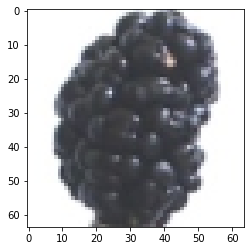

In [59]:
training_fruit_img, test_fruit_img = training_fruit_img / 255.0, test_fruit_img / 255.0 
plt.imshow(training_fruit_img[0])

In [0]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), input_shape = (64, 64, 3), padding = "same", activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(32, (3, 3), padding = "same", activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(32, (3, 3), padding = "same", activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), padding = "same", activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation = "relu"))
model.add(keras.layers.Dense(120, activation = "softmax"))

In [0]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = keras.optimizers.Adamax(), metrics = ['accuracy'])

In [0]:
tensorboard = keras.callbacks.TensorBoard(log_dir = "./Graph", histogram_freq = 0, write_graph = True, write_images = True)

In [68]:
model.fit(training_fruit_img, training_label_id, batch_size = 128, epochs =  10, callbacks = [tensorboard])

Train on 60498 samples
Epoch 1/10
60498/60498 [==============================] - 234s 4ms/sample - loss: 0.0720 - acc: 0.9787
Epoch 2/10
60498/60498 [==============================] - 233s 4ms/sample - loss: 0.0565 - acc: 0.9832
Epoch 3/10
60498/60498 [==============================] - 237s 4ms/sample - loss: 0.0309 - acc: 0.9907
Epoch 4/10
60498/60498 [==============================] - 235s 4ms/sample - loss: 0.0298 - acc: 0.9915
Epoch 5/10
60498/60498 [==============================] - 237s 4ms/sample - loss: 0.0245 - acc: 0.9926
Epoch 6/10
60498/60498 [==============================] - 236s 4ms/sample - loss: 0.0147 - acc: 0.9959
Epoch 7/10
60498/60498 [==============================] - 233s 4ms/sample - loss: 0.0205 - acc: 0.9942
Epoch 8/10
60498/60498 [==============================] - 233s 4ms/sample - loss: 0.0108 - acc: 0.9972
Epoch 9/10
60498/60498 [==============================] - 233s 4ms/sample - loss: 5.6039e-04 - acc: 1.0000
Epoch 10/10
60498/60498 [=====================

In [69]:
loss, accuracy = model.evaluate(test_fruit_img, test_label_id)
print("\n\nLoss:", loss)
print("Accuracy:", accuracy)
model.save("model.h5")

20622/20622 [==============================] - 29s 1ms/sample - loss: 0.1592 - acc: 0.9750


Loss: 0.15917925117228998
Accuracy: 0.97502667


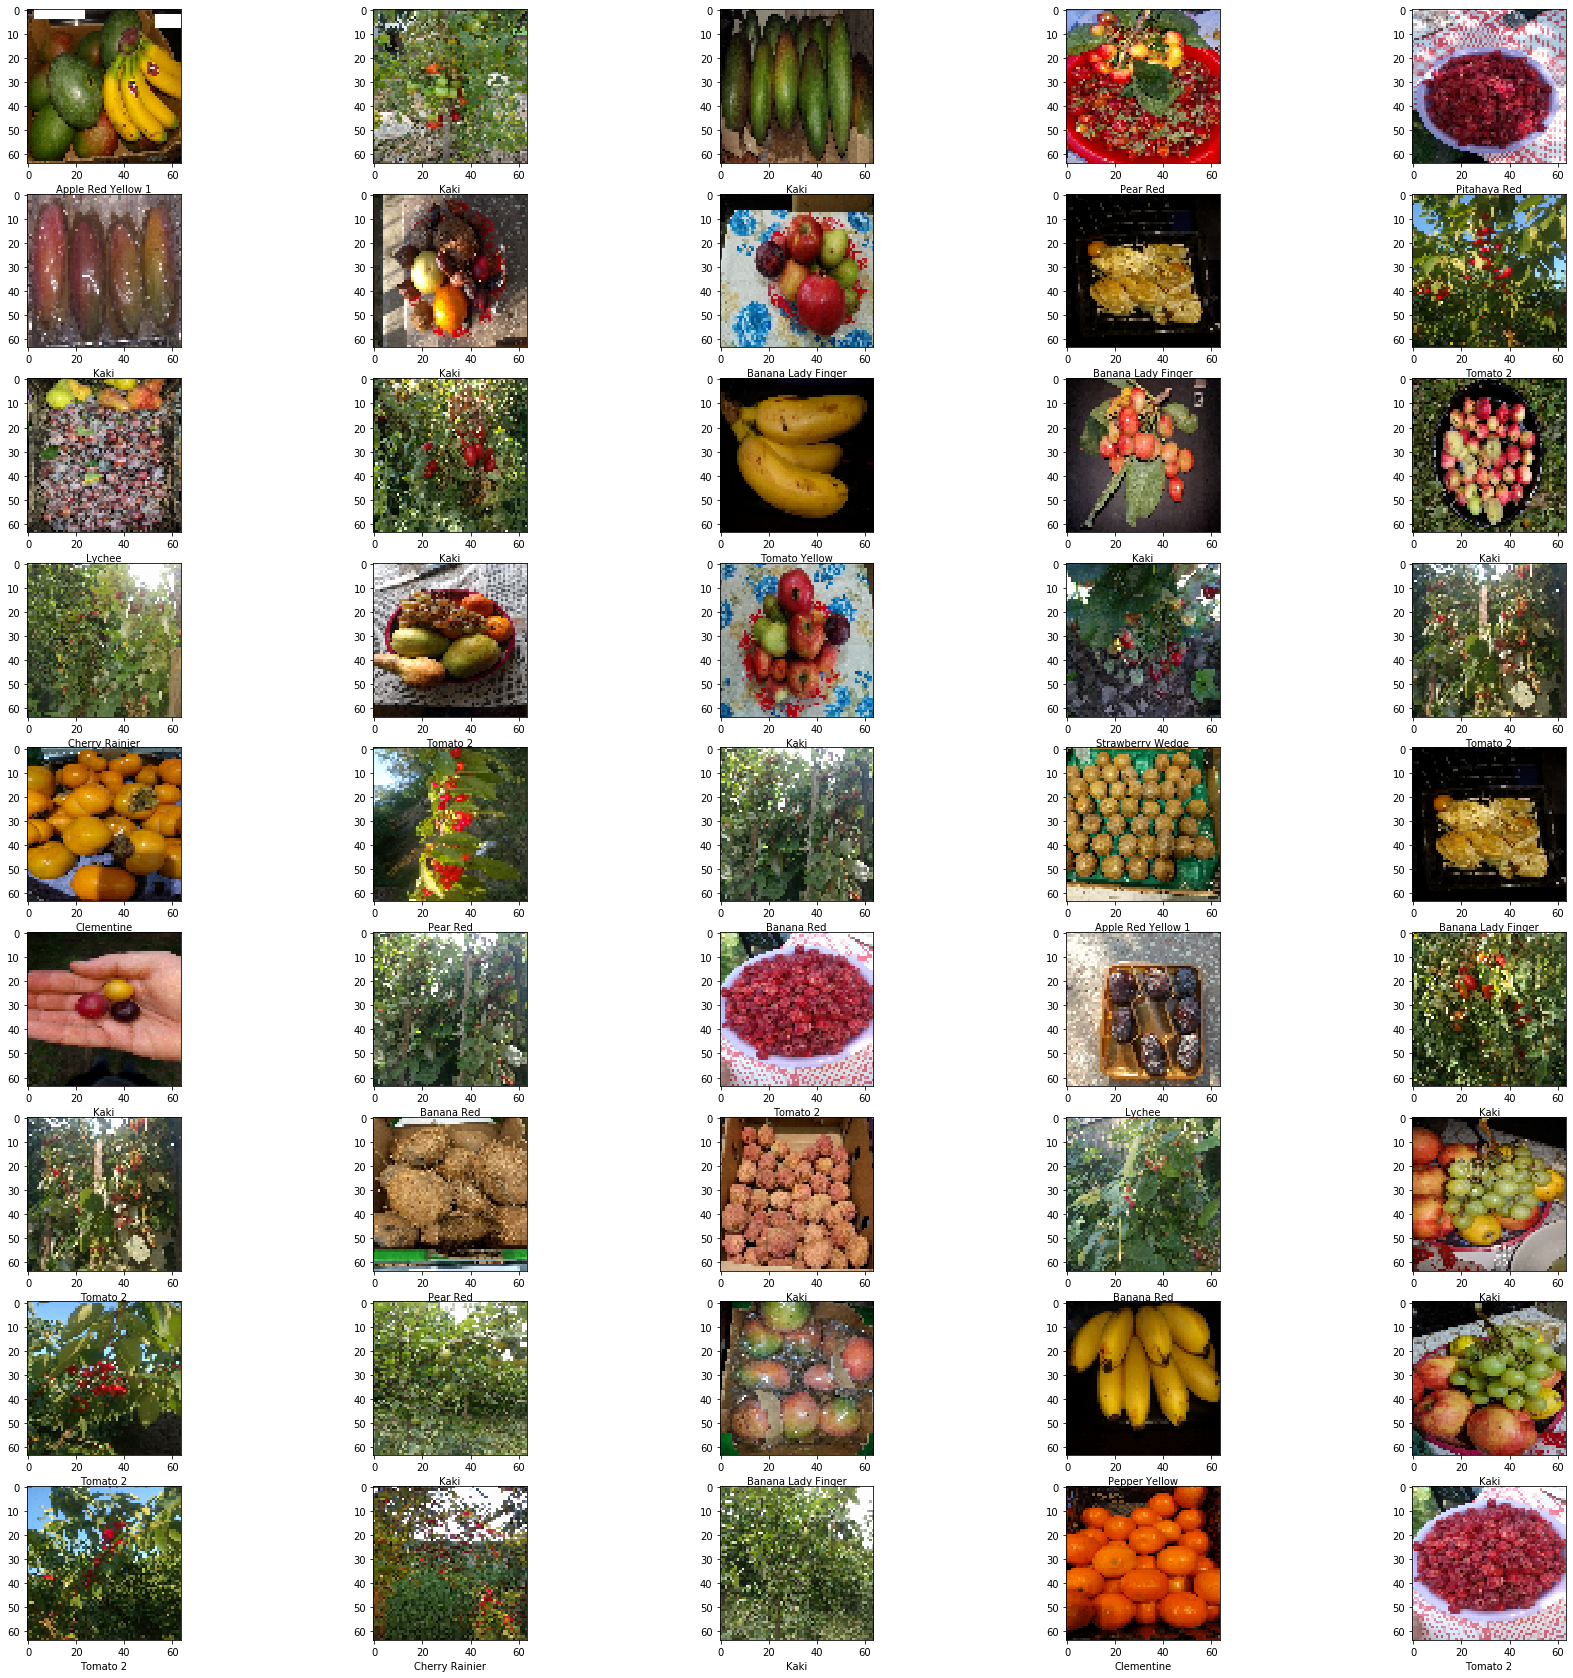

In [70]:
predictions = model.predict(test_fruits_img)
plt.figure(figsize = (30, 30))
for i in range(45):
    plt.subplot(9,5, i + 1)
    plt.xlabel("{}".format(id_to_label[np.argmax(predictions[i])]))
    plt.imshow(test_fruits_img[i])